In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import spotipy 
import librosa
import librosa.display
import numpy as np
import matplotlib as mpl
import urllib.request
import seaborn as sns
import tqdm
import scipy
import joblib
import os.path
from pathlib import Path
from IPython.display import Audio, Markdown, Image
from spotipy.oauth2 import SpotifyClientCredentials

# Números y Datos
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d

# Análisis de sonido
import librosa
import librosa.display
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials 

# Machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn.preprocessing import quantile_transform

from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from sklearn import datasets

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix


#sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
df_merged_all = pd.read_pickle('../sources/df_merged_all_quantiles.pickle')
genre_real = df_merged_all['genre']

df_num = df_merged_all.drop('genre',1)

In [3]:
df_num.head(5).T

id,4d3XHYFFuYYzxWr2cJ6yQl,3X3p3u03P8eFL8WTH0oaaU,4KlXeaheot0OI9PoOWspvZ,3j76McoUI18gDoqxYE14Bu,4zxd4tiXPlWMqoJltbVTbE
duration_ms,0.725755,0.691833,0.720744,0.186198,0.258362
popularity,1.247754,1.168949,-0.012660,0.321971,1.549706
danceability,0.165327,0.877028,1.950719,1.227334,0.152506
energy,-0.926818,-0.714776,-0.465723,-0.063341,-0.930528
key,-0.050661,0.362241,0.889495,-0.619855,1.247754
...,...,...,...,...,...
t07_desvios,0.681921,0.676730,1.037559,1.513294,1.210887
t08_desvios,1.631040,-0.004810,-0.045585,0.807442,0.281830
t09_desvios,0.593479,0.261653,1.050461,2.016564,1.282906
t10_desvios,1.230030,0.947233,1.877638,0.456873,1.216002


In [4]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# newdf = df_merged_all.select_dtypes(include=numerics)

# #newdf = newdf.iloc[:,0:12]

# newdf.head(3).T.head(20)

In [5]:
def plot_conf_matrix(real, Z2,description):
    mat = confusion_matrix(real, Z2)
    sns.heatmap(mat.T, square=False, annot=True, fmt='d', cbar=False,
                xticklabels=genres,
                yticklabels=range(9))
    plt.xlabel('Real')
    plt.ylabel(description);
    plt.show()

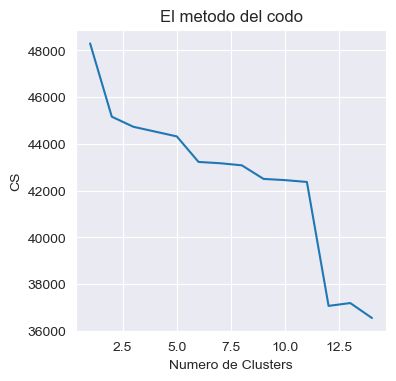

In [7]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMedoids(metric="euclidean", n_clusters=i, max_iter = 300, random_state = 0)
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_num)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('El metodo del codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('CS')
plt.show()

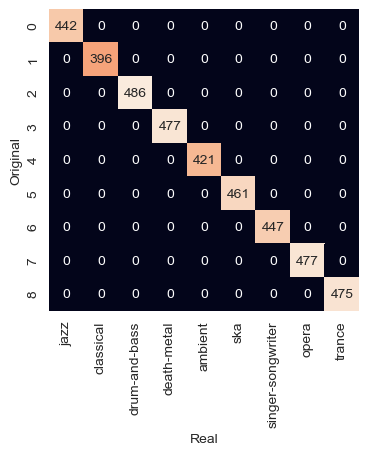

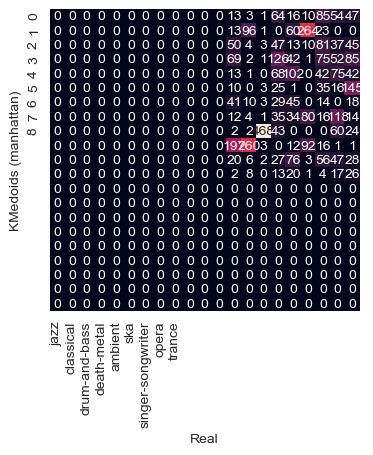

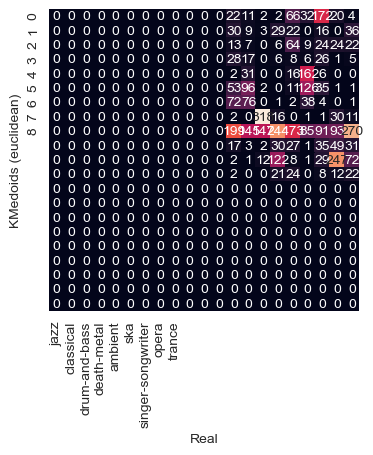

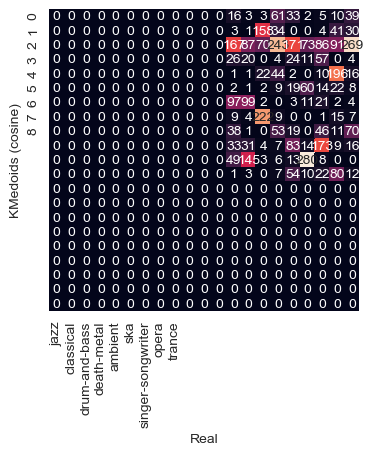

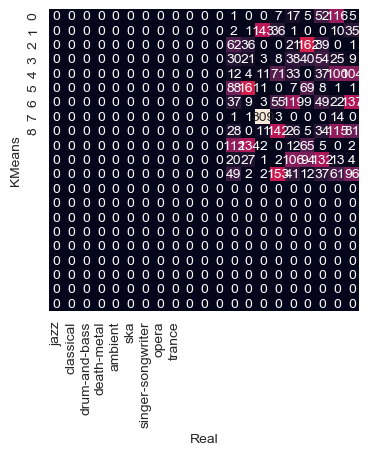

In [31]:
n=12
np.random.seed(3569)

genres = genre_real.unique()

plot_conf_matrix(genre_real.values, genre_real.values,'Original')

selected_models = [
    (
        KMedoids(metric="manhattan", n_clusters=n, max_iter = 300, random_state = 0),
        "KMedoids (manhattan)",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=n, max_iter = 300, random_state = 0),
        "KMedoids (euclidean)",
    ),
    (KMedoids(metric="cosine", n_clusters=n, max_iter = 300, random_state = 0), "KMedoids (cosine)"),
    (KMeans(n_clusters=n, max_iter = 300, random_state = 0), "KMeans"),
]

for i, (model, description) in enumerate(selected_models):
    model.fit(df_num)
    Z = model.predict(df_num)
    Z2 = [str(x) for x in Z]
    #print(description)
    #print(confusion_matrix(genre_real.values, Z2))
    plot_conf_matrix(genre_real.values, Z2,description)

In [ ]:
cs